Astra tool box : https://www.astra-toolbox.com/

Astra tool box for binder : https://github.com/astra-toolbox/astra-toolbox/issues/276

Below here is an example code using a phantom

it creates a sinogram for a parallel reconstruction with various number of projection and reconstruct using FBP or SIRT algorithm. Note that astra-toolbox can also use ART, SART, SIRT, CGLS, FBP


<IPython.core.display.Javascript object>


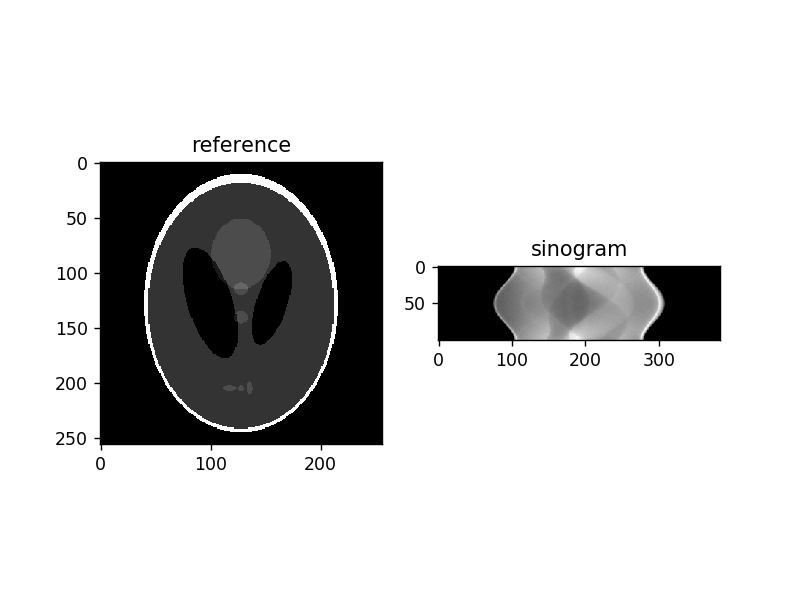

<IPython.core.display.Javascript object>


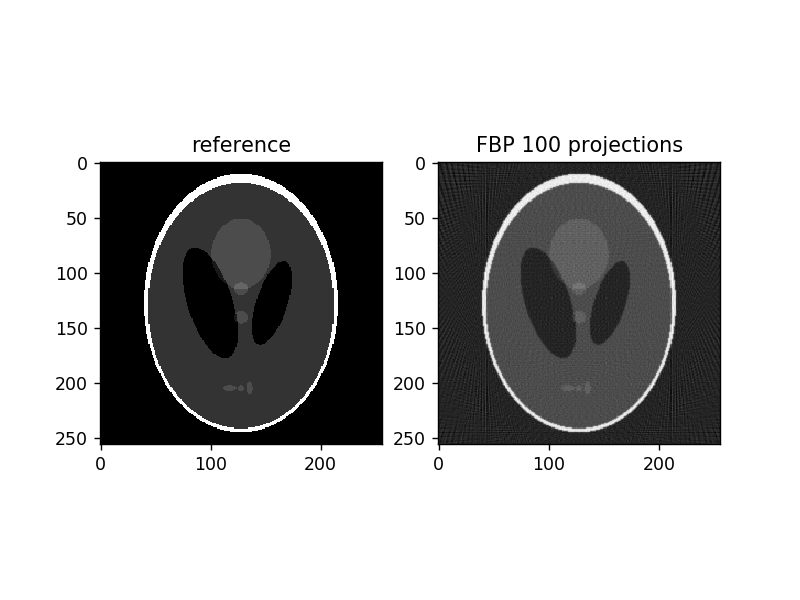

Text(0.5, 1.0, 'FBP 100 projections')

In [22]:

import astra
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import pylab

# select method for reconstruction
nb_projection = 100
method = 'FBP'
nb_iteration = 20 # only for SIRT, SART, CGLS

vol_geom = astra.create_vol_geom(256, 256)
proj_geom = astra.create_proj_geom('parallel', 1.0, 384, np.linspace(0,np.pi,nb_projection,False))

# For CPU-based algorithms, a "projector" object specifies the projection
# model used. In this case, we use the "strip" model.
proj_id = astra.create_projector('strip', proj_geom, vol_geom)

# Create a sinogram from a phantom

P = scipy.io.loadmat('phantom.mat')['phantom256']
sinogram_id, sinogram = astra.create_sino(P, proj_id)


f, ax = plt.subplots(1,2) 
ax[0].imshow(P)
ax[0].set_title('reference')
ax[1].imshow(sinogram)
ax[1].set_title('sinogram')

# Create a data object for the reconstruction
rec_id = astra.data2d.create('-vol', vol_geom)

# Set up the parameters for a reconstruction algorithm using the CPU
# The main difference with the configuration of a GPU algorithm is the
# extra ProjectorId setting.

cfg = astra.astra_dict(method)
cfg['ReconstructionDataId'] = rec_id
cfg['ProjectionDataId'] = sinogram_id
cfg['ProjectorId'] = proj_id

# Available algorithms:
# ART, SART, SIRT, CGLS, FBP


# Create the algorithm object from the configuration structure
alg_id = astra.algorithm.create(cfg)

# Run 20 iterations of the algorithm
# This will have a runtime in the order of 10 seconds.
if (method =='SIRT'):
    astra.algorithm.run(alg_id, nb_iteration)
if (method =='FBP'):
    astra.algorithm.run(alg_id)
if (method=='SART'):
    astra.algorithm.run(alg_id, nb_iteration*nb_projection);
if (method=='CGLS'):
    astra.algorithm.run(alg_id, nb_iteration);

    
# Get the result
rec = astra.data2d.get(rec_id)

# Clean up.
astra.algorithm.delete(alg_id)
astra.data2d.delete(rec_id)
astra.data2d.delete(sinogram_id)
astra.projector.delete(proj_id)

f, ax = plt.subplots(1,2) 
ax[0].imshow(P)
ax[0].set_title('reference')
ax[1].imshow(rec)
ax[1].set_title('%s %d projections' %(method,nb_projection))